FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Mounting drive to be able to read CSV file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Understanding the structure of the data

Make sure to upload the CSV file in your Google Drive, to do that:
1. Click in the file button, last button on the left sidebard.
2. Go to path /drive/MyDrive/
3. Click on the **...** on the right of the folder, and select "Upload"
4. Select the *foodhub_order.csv* file from your computer.
5. Right click *foodhub_order.csv* and "Copy path"
6. Use the path to properly read the file in your setup.

In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

Analyzing the structure of the data.

In [4]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Getting the shape of the data.

In [5]:
# returns the shape of the data with amount of rows and columns
df.shape

(1898, 9)

Checking the datatypes of each column.

In [6]:
# returns the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


The data has 1898 rows and 9 columns.

There are 4 int datatypes (*order_id, customer_id, food_preparation_time, delivery_time*), 1 float datatype (*cost_of_the_order*) and, 4 object datatypes (*restaunt_name, cuisine_type, day_of_the_week, rating*)

In [7]:
# returns statistical information about the data: count, unique entries, top entry, frequency, mean, standard deviation, min, 25% percentile, 50% percentile, 75%, percentile, max.
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


Using the describe function we are able see that:

*   *cost_of_the_order* has a minimum of 4.47 and maximum of 35.41
*   *food_preparation_time* has a minimum of 20 and maximum of 35
*   *delivery_time* has a minimum of 15 and maximum of 33
*   Most popular resturant is *Shake Shack*
*   Most popular cuisine is *American*
*   Most of the orders are placed in the *Weekend*

It is able to confirm that most of the columns do not have any initial outliers in the data. However I noticed that in the *rating* column it is stated that there are only 4 unique entries, and as we saw in the

```
df.head()
```
function that we have a rating of *Not Given* on index number 1 and a *5* on the following index. Which would lead to believe that there should be a total of 6 unique entries, as in the Data Dictionary session it is stated that

> rating: Rating given by the customer out of 5

So each customer can either, not give a rating, "Not Given", or rate any integer between "1" and "5".


We can confirm the value counts of the rating column using the **value_counts()** function which will show the exact count of every entry in the rating column.

In [8]:
# returns a list of all the values for the rating column of the data
df['rating'].value_counts()


,count
rating,
Not given,736
5,588
4,386
3,188


We can confirm that in the data there are no values of "1" or "2" in the data, and "Not given" is the most frquent entry.

#### Observations:

- The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data?

As it was done before while we discovered more information about the data we can get this information with the **shape** function.



In [9]:
# returns the shape of data with the amount of rows and columns
df.shape

(1898, 9)

- The data has 1898 rows and 9 columns.


### What are the datatypes of the different columns in the dataset?

The **info()** function provides us with the datatypes of all the columns in the data.

In [10]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- There are only 3 different data types used in the columns, *int, float, and object.*
- There are 4 int datatypes (*order_id, customer_id, food_preparation_time, delivery_time*)
- 1 float datatype (*cost_of_the_order*)
- 4 object datatypes (*restaunt_name, cuisine_type, day_of_the_week, rating*)


### Are there any missing values in the data?

In [11]:
# info() function is the same function used to check if there are missing values, looking at the non-null count column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- There are no missing values in the data as shown in the **info()** function under the column "Non-null count" as all columns of the data have 1898 non-null entries.


### What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

We can use the functions *min()*, *max()*, and, *mean()* to get the minimum, maximum and average/mean times for food to be prepared

In [12]:
# returns minimum food prep time
df.food_preparation_time.min()

20

In [13]:
# returns average/mean food prep time
df.food_preparation_time.mean()

np.float64(27.371970495258168)

In [14]:
# returns maximum food prep time
df.food_preparation_time.max()

35

Alternativaly we can use the *describe()* function, to find the same information with a single function

In [15]:
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


- Of all data entries the shortest (minimum) time for food to be prepared is **20 minutes**
- The longest (maximum) time for food to be prepared is **35 minutes**
- The average (mean) time for food to be prepared is **27.37 minutes**.


### How many orders are not rated?

As done previously is our first general analysis of the data we can use the function *value_counts()* in the "rating" column of the data.

In [16]:
# returns a list of all the values for the rating column of the data
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


- There were a total of **736** orders not rated out of the 1898 total orders provided in the data.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

Using the *head()* function to easily see the data and provide meaningful graphs for each variable of the data.

In [17]:
# returns the first 5 rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Exploring all the variables and providing observations on their distributions.

#### order_id

<Axes: title={'center': 'Histogram: Order ID'}, xlabel='Order ID', ylabel='# of Orders'>

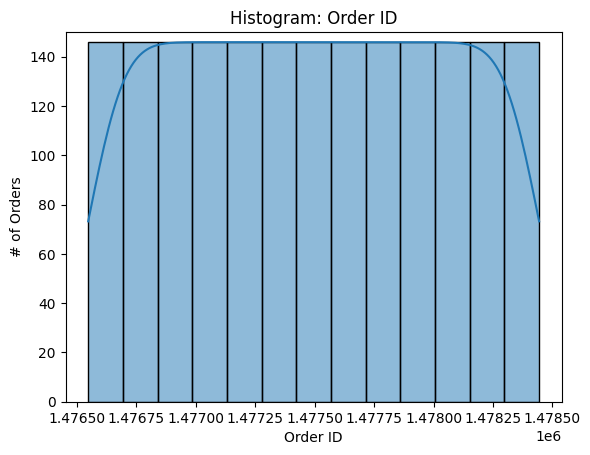

In [18]:
plt.title('Histogram: Order ID')
plt.ylim(0,150)
plt.xlabel('Order ID') # x axis label
plt.ylabel('# of Orders') # y axis label
sns.histplot(data=df, x='order_id', kde=True) # displays the histogram of order_id variable

There is no real analysis that can be made from the histogram, which is expected considering it is just a unique identifier for the orders.

#### customer_id

<Axes: title={'center': 'Histogram: Customer ID'}, xlabel='Customer ID #', ylabel='# of Orders'>

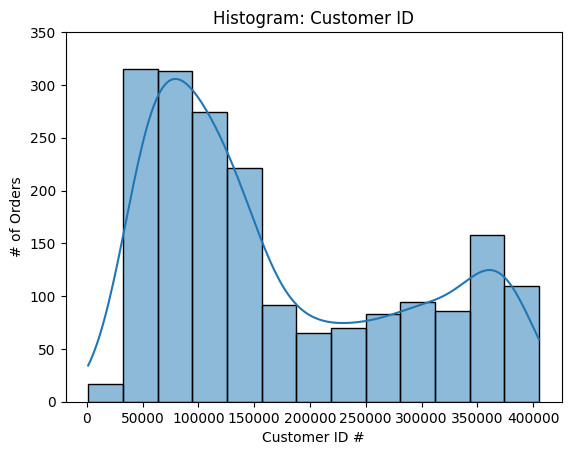

In [19]:
plt.title('Histogram: Customer ID')
plt.ylim(0, 350)
plt.xlabel('Customer ID #') # x axis label
plt.ylabel('# of Orders') # y axis label
sns.histplot(data=df, x='customer_id', kde=True) # displays the histogram of restaurant_name variable to have a better idea of the amount of orders per restaurants

For the histogram above we can see that in general customers with smaller ID #s make more orders compared with higher ID #s

#### restaurant_name

<Axes: title={'center': 'Histogram: Restaurant Name'}, xlabel='Restaurant', ylabel='# of Orders'>

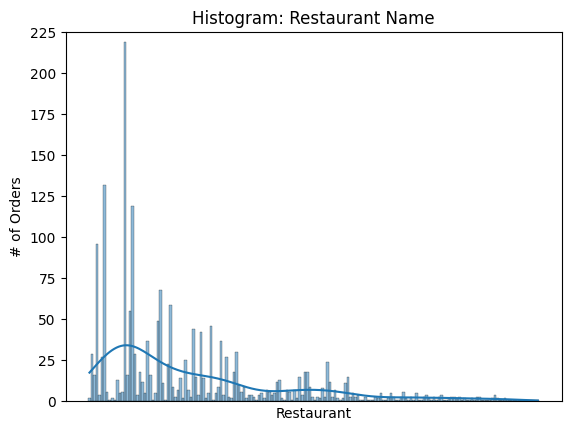

In [20]:
plt.title('Histogram: Restaurant Name')
plt.ylim(0,225)
plt.xticks(ticks=[], labels=[]) # remove the names of the restaurant as it caused clutter in the graph
plt.xlabel('Restaurant') # x axis label
plt.ylabel('# of Orders') # y axis label
sns.histplot(data=df, x='restaurant_name', kde=True) # displays the histogram of restaurant_name variable to have a better idea of the amount of orders per restaurants

In [21]:
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


Due to the great amount of unique entries for the restaurant_name variable, the histogram is not able to alow provide great insight of the number of orders done by restaurants, but it is possible to see that there are a small amount of restaurants that get a majority of the orders while the orders have 25 orders or less.

#### cuisine_types

<Axes: title={'center': 'Countplot: Cuisine Type'}, xlabel='Cuisine Type', ylabel='Count'>

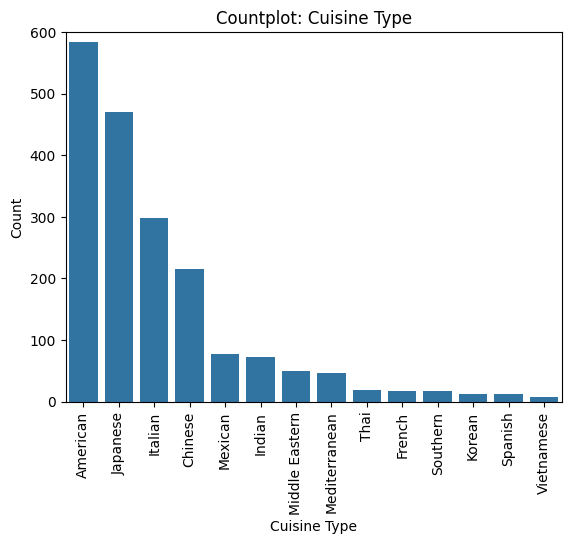

In [22]:
plt.title('Countplot: Cuisine Type') # graph title
plt.ylim(0,600) # sets the range of the y-axis
plt.xticks(rotation=90) # rotates the xticks 90 degrees to have the cuisine type names not overlap
plt.xlabel('Cuisine Type') # x axis label
plt.ylabel('Count') # y axis label
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index) # getting the countplot for the cuisine_type variable in frequency order

In [23]:
# returns a list of all the values for the cuisine_type column of the data, to have a precise count of each cuisine_type
df['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


We can observe that the top 5 cuisines by order amount is:

1.   American - 584 Orders
2.   Japanese - 470 Orders
3.   Italian - 298 Orders
4.   Chinese - 215 Orders
5.   Mexican - 77 Orders

#### cost_of_the_order

<Axes: title={'center': 'Histplot: Cost of the Order'}, xlabel='Cost (in dollars)', ylabel='Count'>

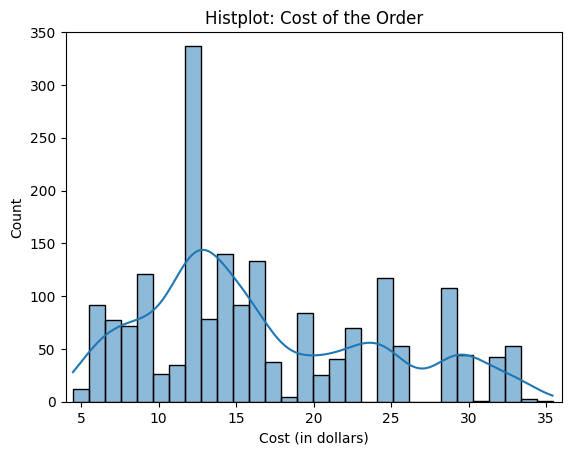

In [24]:
plt.title('Histplot: Cost of the Order') # graph title
plt.ylim(0,350) # sets the range of the y-axis
plt.xlim(4,36) # sets the range of the x-axis
plt.xlabel('Cost (in dollars)') # x axis label
plt.ylabel('Count') # y axis label
sns.histplot(data=df, x='cost_of_the_order', bins=30, kde=True) # getting the boxplot for the cost_of_the_order variable, with 30 bins to better analyze the amounts per dollar amount.

In [25]:
# returns a list of all the values for the cost_of_the_order column of the data, to have a precise count of each cost
df['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


We infer that most of the orders are between the 12 and 17 dollars, having also majority of the cost be in the lower cost range.



#### day_of_the_week

<Axes: title={'center': 'Countplot: Day of the Week'}, xlabel='Day of the Week', ylabel='Count'>

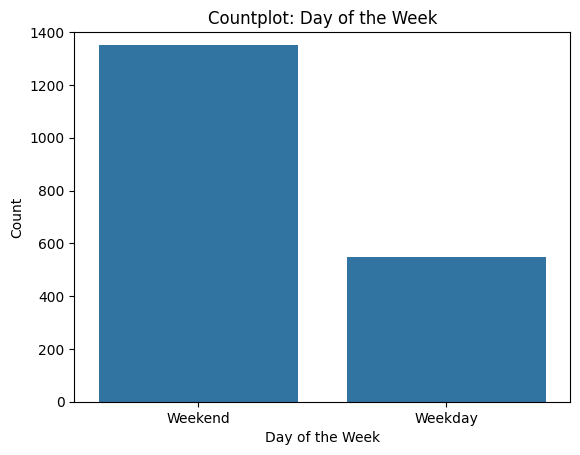

In [26]:
plt.title('Countplot: Day of the Week') # graph title
plt.ylim(0,1400) # sets the range of the y-axis
plt.xlabel('Day of the Week') # x axis label
plt.ylabel('Count') # y axis label
sns.countplot(data=df, x='day_of_the_week') # getting the countplot for the day_of_the_week variable in frequency order

In [27]:
# returns a list of all the values for the day_of_the_week column of the data, to have a precise count of weekdays and weekends
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


The data shows that majority of the orders are made in the weekends compare to week days with a great margin of around ~2.5 times more orders being made in the weekends as in the weekdays.

#### rating

<Axes: title={'center': 'Countplot: Ratings'}, xlabel='Ratings', ylabel='Count'>

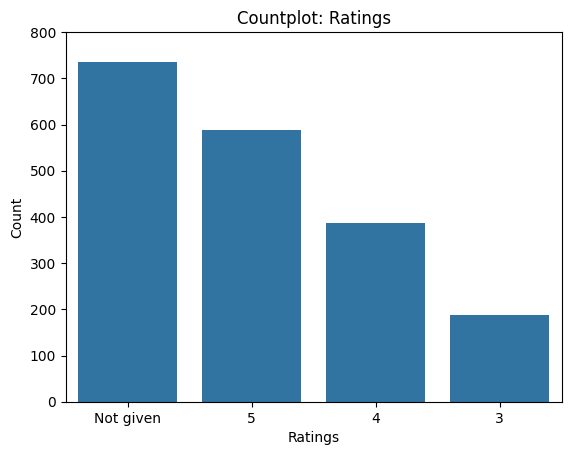

In [28]:
plt.title('Countplot: Ratings') # graph title
plt.ylim(0,800) # sets the range of the y-axis
plt.xlabel('Ratings') # x axis label
plt.ylabel('Count') # y axis label
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index) # getting the countplot for the rating variable in frequency order

In [29]:
# returns a list of all the values for the rating column of the data, to have a precise count of the ratings
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


From the data around ~0.39 of all orders do not get rated by customers, out of the remaining ~0.61 half of the same are 5 star ratings, with around ~0.31.

#### food_preparation_time

<Axes: title={'center': 'Histplot: Food Preparation Time'}, xlabel='Time (in minutes)', ylabel='Count'>

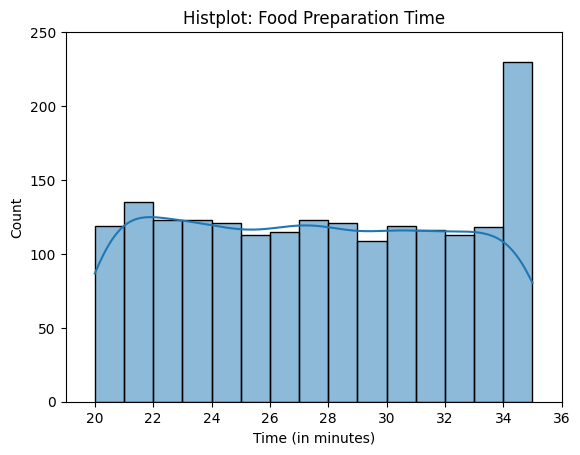

In [30]:
plt.title('Histplot: Food Preparation Time') # graph title
plt.ylim(0,250) # sets the range of the y-axis
plt.xlim(19,36) # sets the range of the x-axis
plt.xlabel('Time (in minutes)') # x axis label
plt.ylabel('Count') # y axis label
sns.histplot(data=df, x='food_preparation_time', bins=15, kde=True) # getting the boxplot for the food_preparation_time variable, with 18 bins to better analyze the time it takes for orders to be prepared.

In [31]:
# returns a list of all the values for the cuisine_type column of the data, to have a precise count of each cuisine_type
df['food_preparation_time'].value_counts()

,count
food_preparation_time,
21,135
23,123
27,123
22,123
28,121
24,121
30,119
20,119
33,118


The histogram initially suggests that close to ~0.12 of all orders take the longest recorded time to be completed, however when using the value_counts() function we can see that it was just an outlier, and it is possible to get a better visualization of the same looking at the KDE of the histogram.

#### delivery_time

<Axes: title={'center': 'Histplot: Delivery Time'}, xlabel='Time (in minutes)', ylabel='Count'>

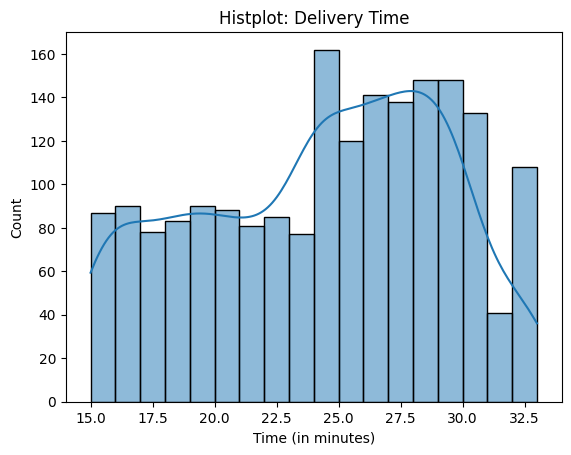

In [32]:
plt.title('Histplot: Delivery Time') # graph title
plt.ylim(0,170) # sets the range of the y-axis
plt.xlim(14,34) # sets the range of the x-axis
plt.xlabel('Time (in minutes)') # x axis label
plt.ylabel('Count') # y axis label
sns.histplot(data=df, x='delivery_time', bins=18, kde=True) # getting the boxplot for the delivery_time variable, with 18 bins to better analyze the time it takes for orders to be delivered.

Majority of the orders take around 23 to 31 minutes to be completed, which are in the higher end values of the graph.

### Which are the top 5 restaurants in terms of the number of orders received?

The function *value_counts()* can provide the answer for this question once again now used in the "restaurant_name" column of the data.

In [33]:
# returns a list of the top 5 the values for the restaurant_name column of the data
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


The top 5 restaurants in terms of orders received are the following:

1.   Shake Shack - 219 Orders
2.   The Meatball Shop - 132 Orders
3.   Blue Ribbon Sushi - 119 Orders
4.   Blue Ribbon Fried Chicken - 96 Orders
5.   Parm - 68 Orders

### Which is the most popular cuisine on weekends?

To get the most popular cuisine on the weekends, we will first select only the orders from the Weekend and then, use the *groupby('cuisine_type)* function alongside the *count()* function in reference to the *0order_id* to get unique orders and find the mosr popular cuisine for the weekends. We will also sort the search by setting ascending to False as we want to most popular cuisine.

In [34]:
# returns in descending order the most popular cuisine in the weekends
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type').count()['order_id'].sort_values(ascending=False)

,order_id
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


- The most popular cuisine on the weekends is **American cuisine** with a total of 415 Orders


### What percentage of the orders cost more than 20 dollars?

To obtain the percentage of order that cost more than 20 dollars we will set a condition based on the cost of the orders that are greater than 20 dollars, divide the number found by the total amount of rows in the data and then multiply by 100 to get the percentage.

In [35]:
# returns the % of orders that cost more than 20 dollars
df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100

29.24130663856691

- From all the orders, **29.24%** of them cost more that 20 dollars


### What is the mean order delivery time?

To find the mean/average order delivery time we can use the *mean()* function

In [36]:
# returns the mean/average of the delivery time
df['delivery_time'].mean()

np.float64(24.161749209694417)

- In average/mean the orders take **24.16** minutes to be delivered.


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

We can use the *value_counts()* function, use the *head(3)* to only display the top 3 customers and the amount of times they placed orders.

In [37]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


The top 3 most frequent customers are:

1.   ID# 52832 - 13 Orders
2.   ID# 47440 - 10 Orders
3.   ID# 83287 - 9 Orders

### Multivariate Analysis

### Performing a multivariate analysis to explore relationships between the important variables in the dataset.


#### We will initially create a pairplot to quickly observe any possible relationships between the variables.

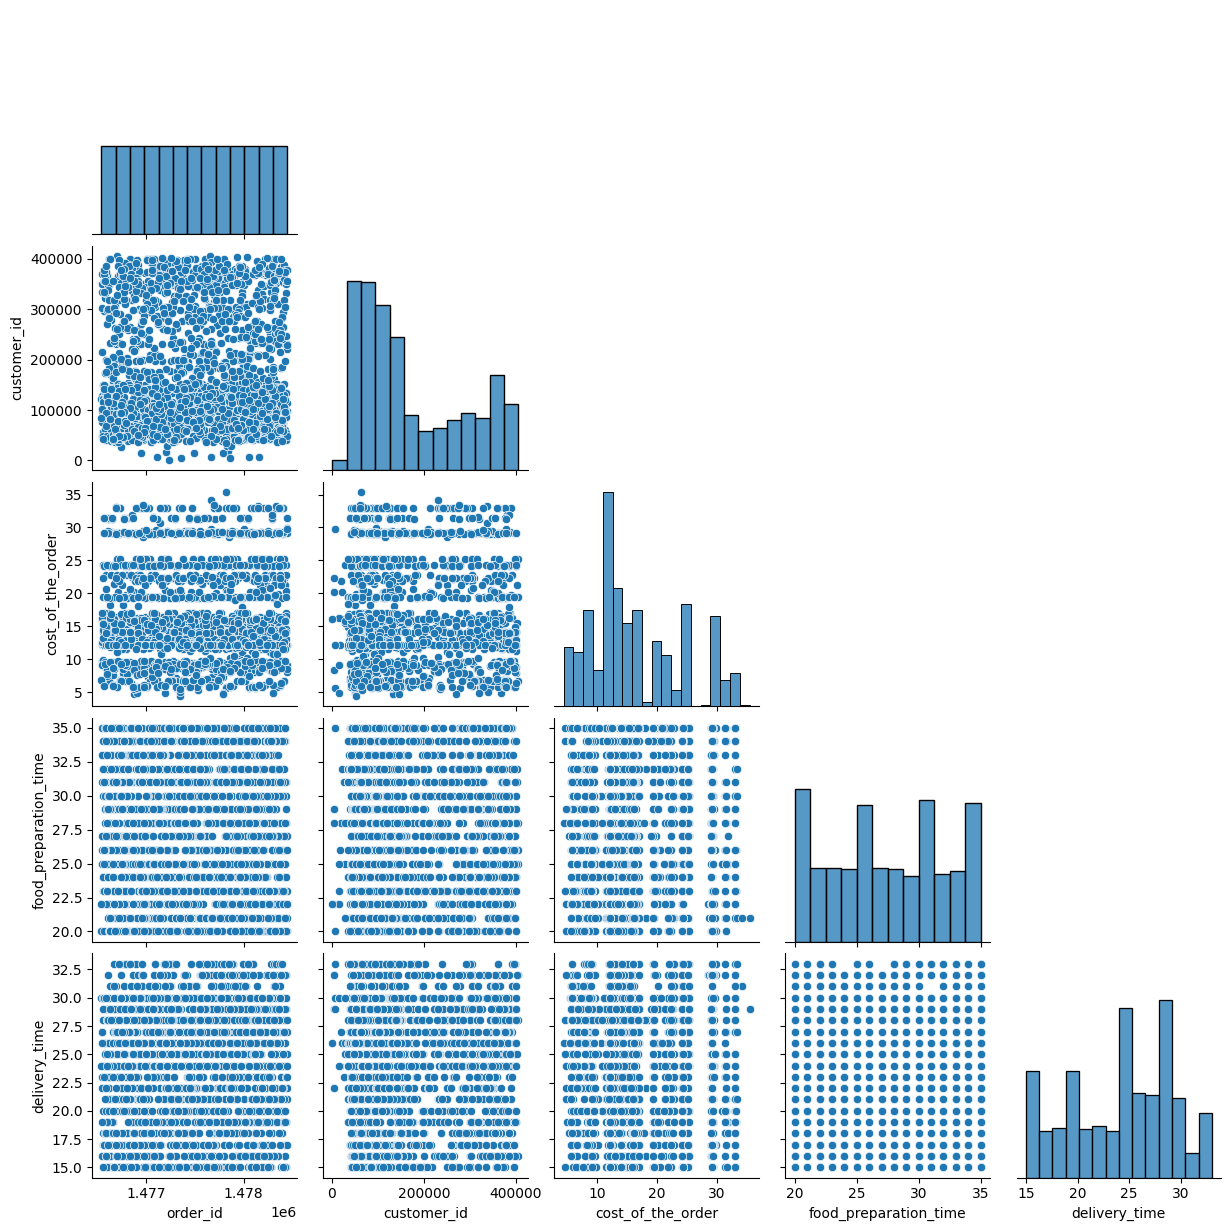

In [38]:
sns.pairplot(df, corner=True)

When creating the pairplot with the standard scatterplot we are not able observe and see any possible relationships within the variables.

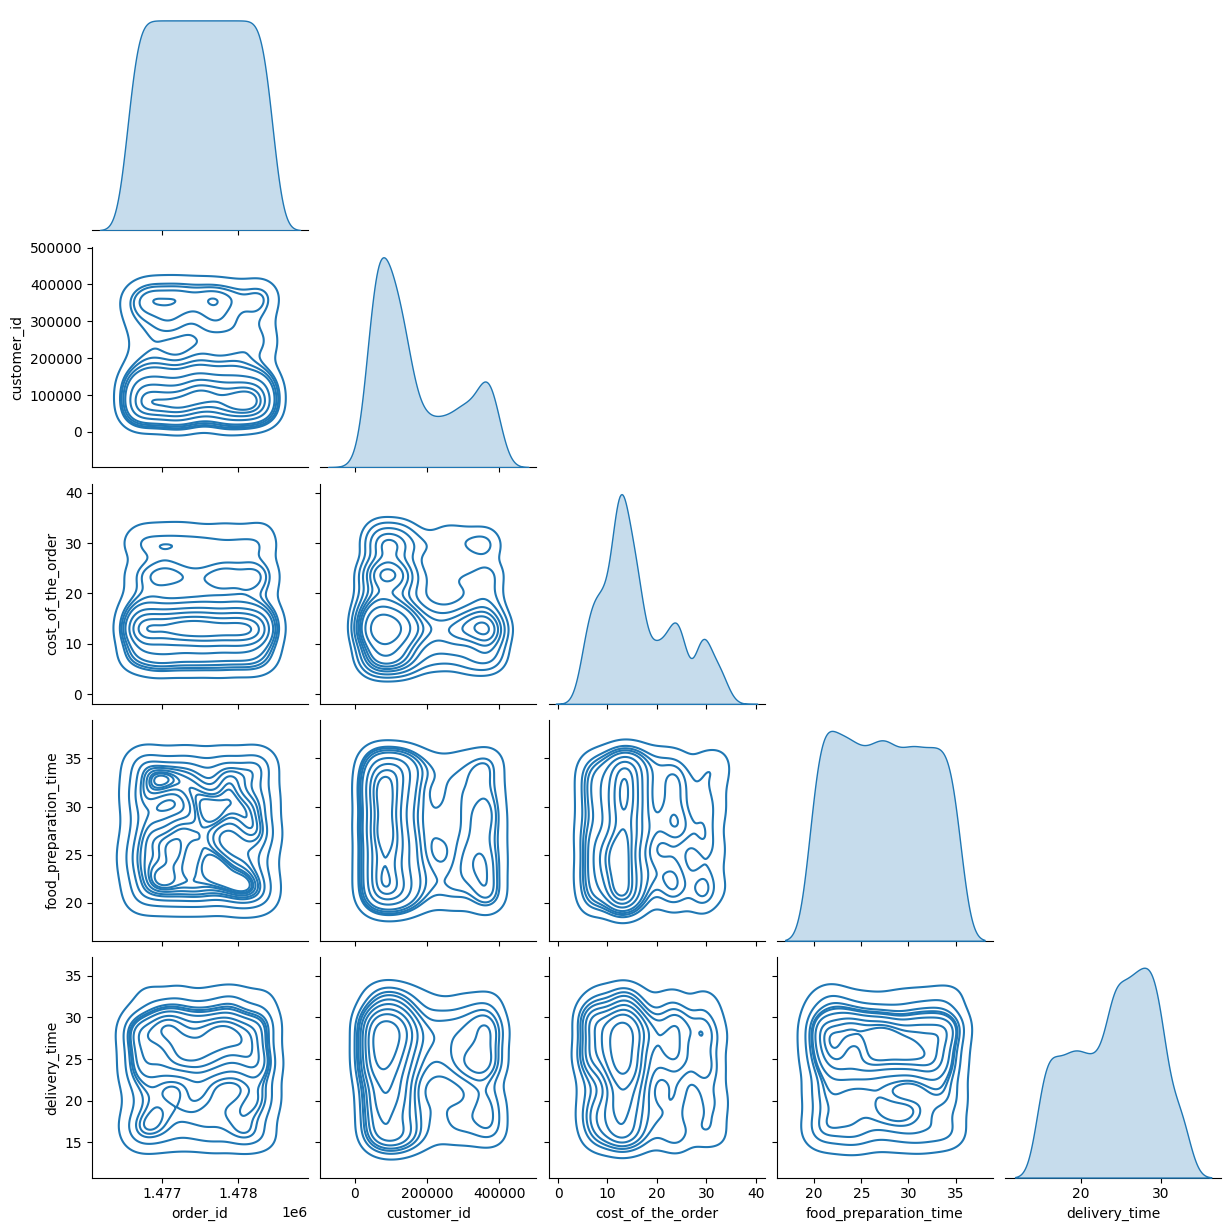

In [39]:
sns.pairplot(df, kind='kde', corner=True) # displays the pairplot with kde for the plot

Looking at the new pairplot created with kde, we can start to see a some better relationships within the variables:

*   Smaller values of customer_id have a majority of the order_id values.
*   Smaller values of customer_id, spend smaller amounts of money in their orders
*   Smaller values of customer_id, have an even spread of food preparation and delivery times
*   Similarly cheaper orders also have an even spread of food preparation and delivery times
*   We can see as well that delivery times are longer in general, regardless of how long the food takes to be prepared



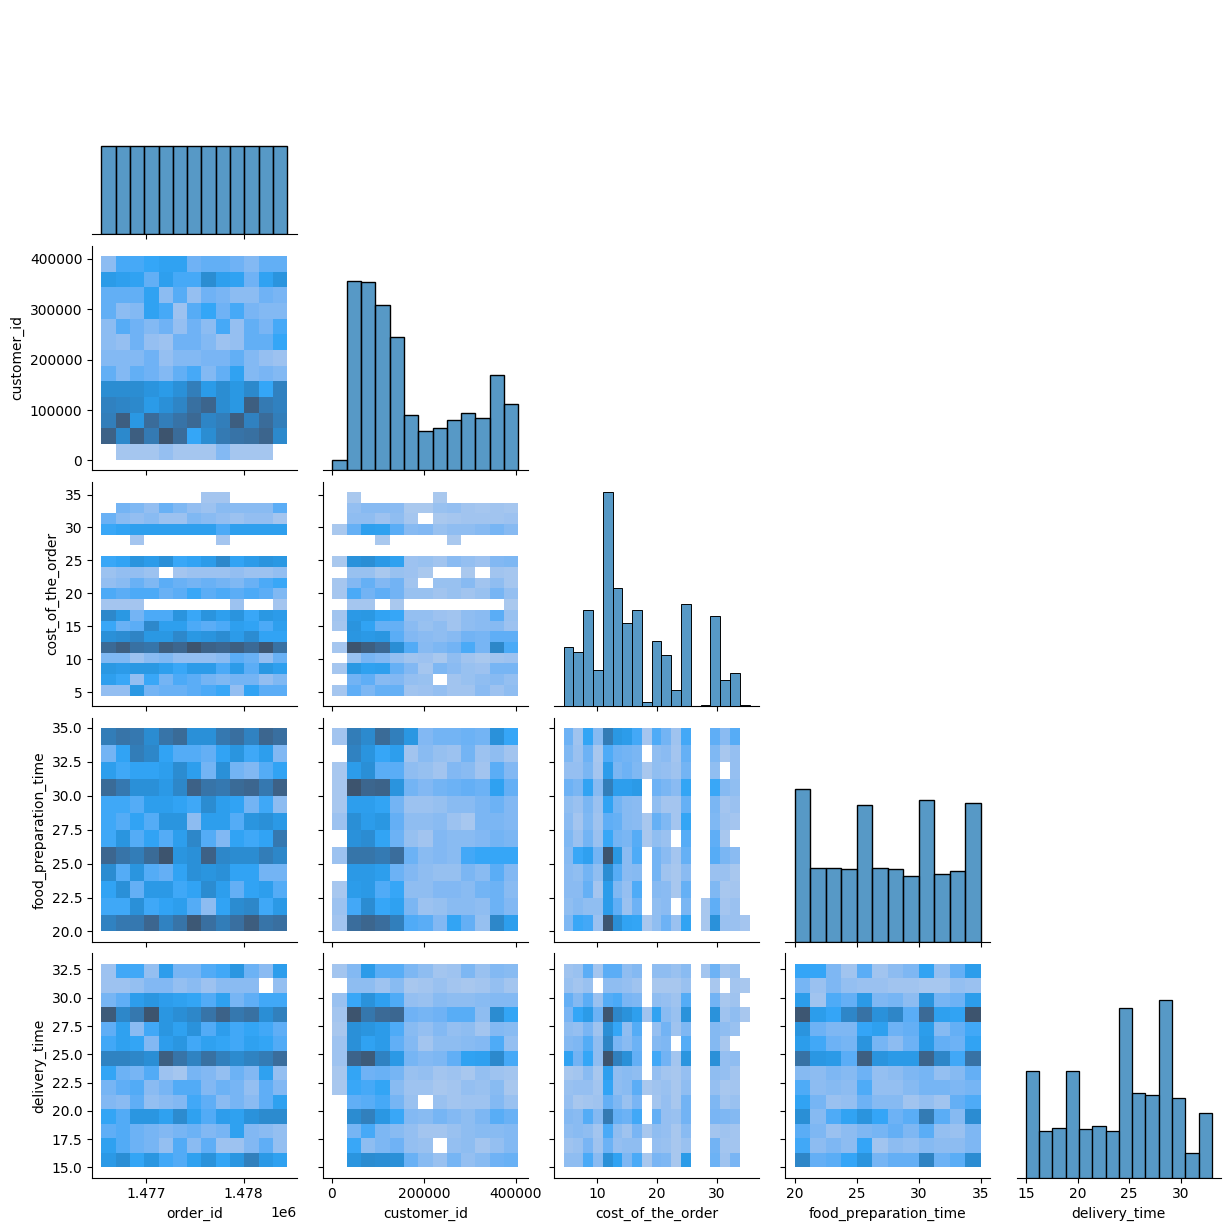

In [40]:
sns.pairplot(df, kind='hist', corner=True) # displays the pairplot with kde for the plot

The third pairplot created with histograms confirms the relationships stated above by looking at the darker areas of the graphs.

Now we can look with more detail within specific relationships of the data.

#### **Cuisine Type Vs Cost of the Order**

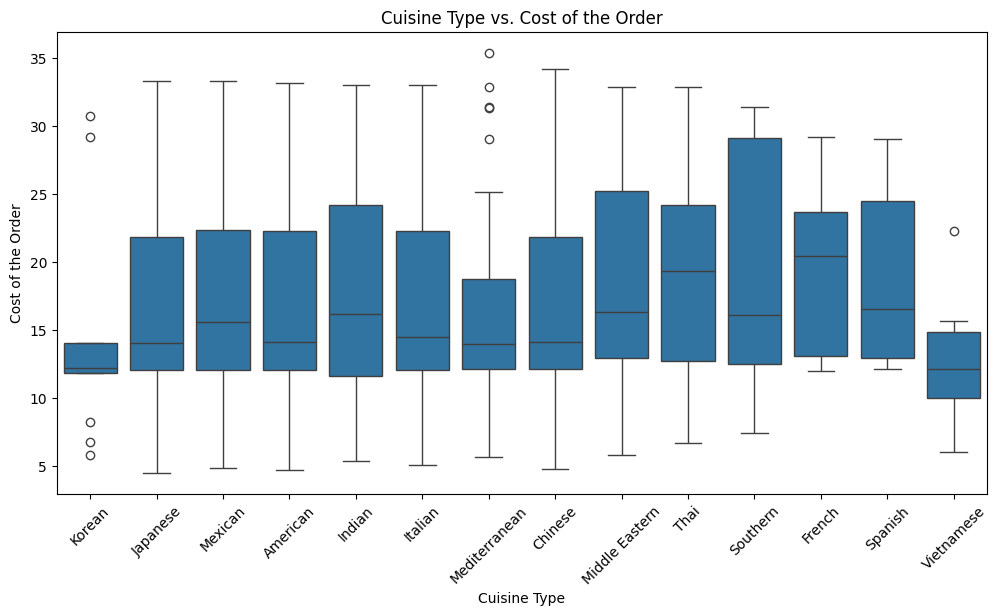

In [41]:
plt.figure(figsize=(12, 6)) # shape of the graph
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order') # boxplot graph comparing cuisine_type and cost_of_the_order
plt.xticks(rotation=45) # rotating the x ticks to better see cuisine type names
plt.title('Cuisine Type vs. Cost of the Order') # graph title
plt.xlabel('Cuisine Type') # x label title
plt.ylabel('Cost of the Order') # y label title
plt.show() #displaying the graph

*   Most of the cuisine provided have a minimum cost of order averaging around $12.

*   Vietnamese cuisine has the cheapest cuisine, with Korean cuisine being the second cheapest.
*   Southern cuisine is the most expensive cuisine option offered
*   Mediterranean cuisine has a couple outliers that have the maximum cost in the data
*   Korean cuisine has a similar outlier around $30 dollars,compared to its average of 12-14 dollars.

*   Out of the 14 cuisine types offered, 11 of them have their cost orders fall between $12-25 dollars.


#### **Cost of the Order Vs Food Preparation Time**

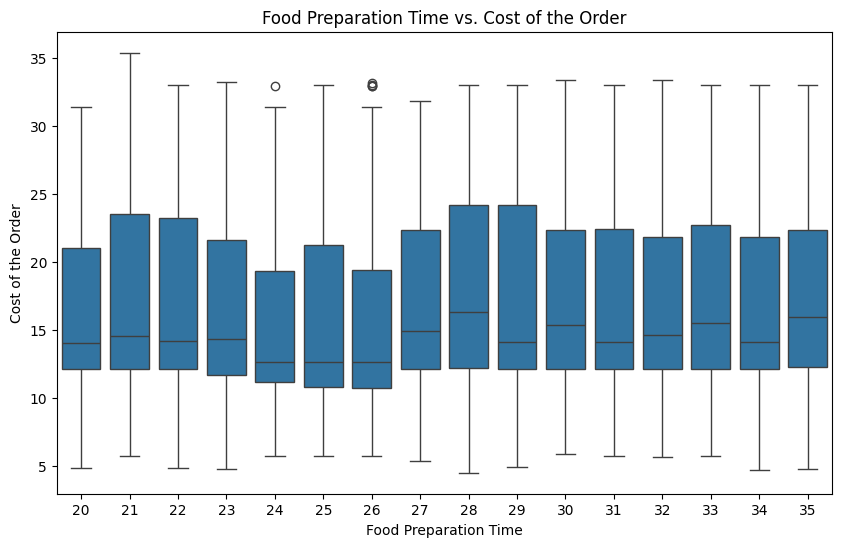

In [42]:
plt.figure(figsize=(10, 6)) # shape of the graph
sns.boxplot(data=df, x='food_preparation_time', y='cost_of_the_order') # boxplot graph comparing food_preparation_time and cost_of_the_order
plt.title('Food Preparation Time vs. Cost of the Order') # graph title
plt.xlabel('Food Preparation Time') # x label title
plt.ylabel('Cost of the Order') # y label title
plt.show() #displaying the graph

- Regardless of the food preparation time the minimum cost order averages at 5 dollars, with the maximum ranging from $31-36 dollars.


- Between all the food preparation times we in average all orders fall between the similar range of $12-24 dollars.


- We can see that the cost of the order does not have a clear relationship with food preparation as, even at the minimum or maximum cost the preparation time is not either postively or negatively related to it.


#### **Delivery Time Vs Rating**

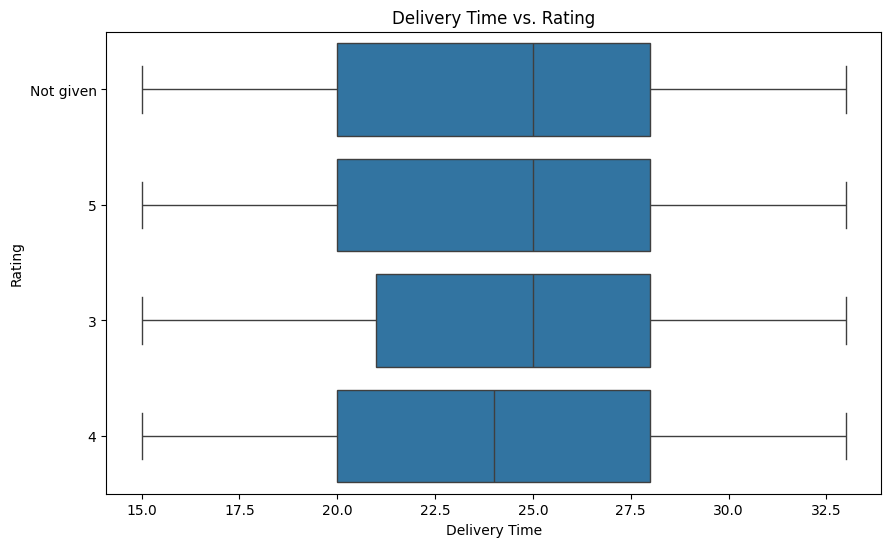

In [43]:
plt.figure(figsize=(10, 6)) # shape of the graph
sns.boxplot(x='delivery_time', y='rating', data=df) # boxplot graph comparing delivery_time and rating
plt.title('Delivery Time vs. Rating') # graph title
plt.xlabel('Delivery Time') # x label title
plt.ylabel('Rating') # y label title
plt.show() #displaying the graph

- All of the rating values have in average 20-27.5 minutes of delivery times
- The minimum delivery time for all rating values in the data is 15 minutes
- The maximum delivery time for all rating values in the data is 33 minutes
- Analyzing this boxplot we can see that the delivery time does not have a strong relationship between the rating give on the order, meaning that even as fast or slow delivery time for the order does not provide a clear outlier for a better or worse rating on the orders.

#### **Food Preparation Time Vs Rating**

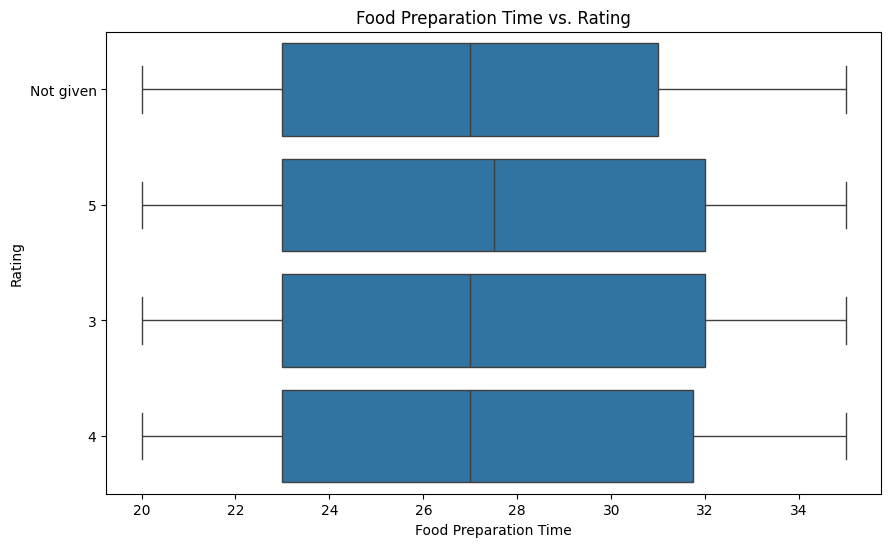

In [44]:
plt.figure(figsize=(10, 6)) # shape of the graph
sns.boxplot(x='food_preparation_time', y='rating', data=df) # boxplot graph comparing food_preparation_time and rating
plt.title('Food Preparation Time vs. Rating') # graph title
plt.xlabel('Food Preparation Time') # x label title
plt.ylabel('Rating') # y label title
plt.show() #displaying the graph

- The rating values of 3,4, and 5 have in average 23-32 minutes of preparation time, with the rating not given averaging between 23-31 minutes.
- The minimum preparation time for all rating values in the data is 20 minutes
- The maximum preparation time for all rating values in the data is 35 minutes
- Analyzing this boxplot we can see that the food preparation time does not have a strong relationship between the rating give on the order, meaning that even as fast or slow preparation time for the order does not provide a clear outlier for a better or worse rating on the orders.

#### **Cuisine Type Vs Food Preparation Time**

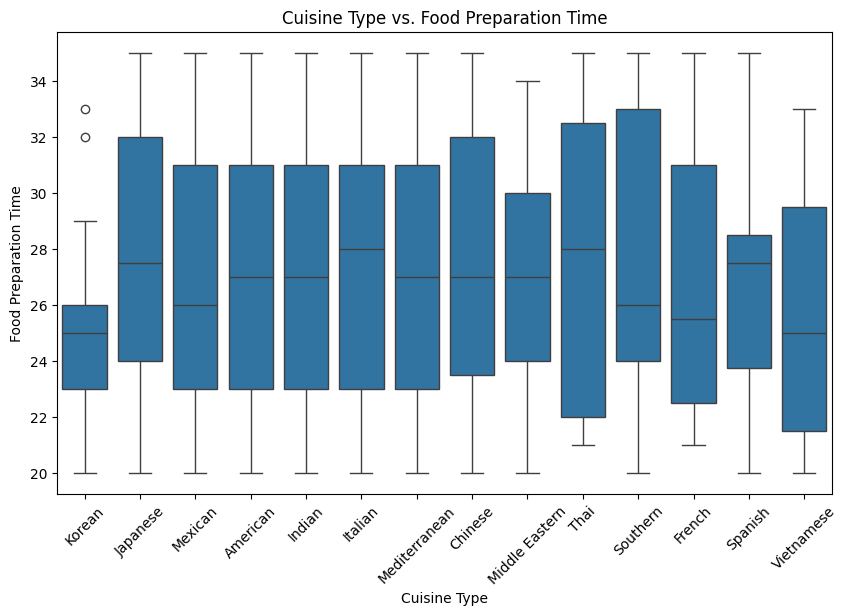

In [45]:
plt.figure(figsize=(10, 6)) # shape of the graph
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df) # boxplot graph comparing cuisine_type and food_preparation_time
plt.xticks(rotation=45) # rotating the x ticks to better see cuisine type names
plt.title('Cuisine Type vs. Food Preparation Time') # graph title
plt.xlabel('Cuisine Type') # x label title
plt.ylabel('Food Preparation Time') # y label title
plt.show() #displaying the graph

*   Korean cuisine is the one with the smallest food preparation time variance of 3 minutes, averaging between 23-26 minutes. It does have 2 outliers in which the preparation time were 32 and 33 minutes.
*   Thai cuisine is the one with the largest food preparation time variance of 10 minutes, averaging between 22-32 minutes.
*   The average food preparation time for most of the cuisines range from 23-31 minutes, with a variance of 8 minutes in average.
*   The minimum delivery time for majority of the cuisine types in the data is 20 minutes
*   The maximum delivery time for majority of the cuisine types in the data is 35 minutes

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

To find the restaurants that fit the criteria for the promotional offer we first need to take a look again at the *rating* variable.

In [46]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


Since we are only considering restaurants that have a rating count higher than 50 we can remove all the entries with a rating value of "Not given".


To do this we will create a copy of the data to not change anything from the original data. we can use the *copy()* function for that.

In [47]:
# creating a copy of the df dataframe named df2, to do the manipulations for the question using the copy() function
df2 = df.copy()

Now we can create a condition to remove all the "Not given" values from the rating column, and change the datatype of the rating variable to integers.

In [48]:
df2 = df2[df2['rating'] != 'Not given'] # removing all the "Not given" values from the rating column
df2['rating'] = df2['rating'].astype(int) # changing the datatype of the rating column to integer
df2['rating'].value_counts() # checking the new updated ratings column

,count
rating,
5,588
4,386
3,188


Now we are able to group the restaurants and calculate both the count and mean of the ratings.

In [49]:
promotional_restaurants = df2.groupby('restaurant_name')['rating'].agg(['count', 'mean']) # creating a new dataframe named promotional_restaurants which displays all the restaurants with the amount of ratings they have and their rating average.
promotional_restaurants # displaying the dataframe

,count,mean
restaurant_name,,
'wichcraft,1,5.000000
12 Chairs,2,4.500000
5 Napkin Burger,2,4.000000
67 Burger,1,5.000000
Amma,2,4.500000
...,...,...
Zero Otto Nove,1,4.000000
brgr,1,3.000000
da Umberto,1,5.000000


Since we are looking to find the restaurants with more than 50 ratings and a rating average higher than 4 we can create a condition to select those specific parameters

In [50]:
promotional_restaurants = promotional_restaurants[(promotional_restaurants['count'] > 50) & (promotional_restaurants['mean'] > 4)] # setting the promotional_restaurants dataframe to show only restaurants with more than 50 ratings and average higher than 4.
promotional_restaurants # displaying the dataframe

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


The restaurants that fulfill the promotional offer criteria set by the company are:

*   Shake Shack - 133 Ratings with a average rating of 4.27
*   The Meatball Shop - 84 Ratings with a average rating of 4.51
*   Blue Ribbon Sushi - 73 Ratings with a average rating of 4.22
*   Blue Ribbon Fried Chicken - 64 Ratings with a average rating of 4.33



### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

First we need to find the all the orders with a cost greater than 20 dollars.

In [51]:
over_20 = df[df['cost_of_the_order'] > 20] # getting all the values that cost more than 20 dollars
over_20 # displaying the variable

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


We can now make calculations on the amount that was charged to those orders by multiplying the cost_of_the_order values by 0.25, and adding all those values using the *sum()* function.

In [52]:
rev20 = over_20['cost_of_the_order'] * 0.25 # multiplying all cost order values by .25
total20 = rev20.sum() # adding all the values
total20 # displaying the variable

np.float64(3688.7275)

Next we need to find the all the orders with a cost greater than 5 dollars and under 20 dollars.

In [53]:
over_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)] # getting all the values that cost more than 5 dollars and less than 20 dollars
over_5 # displaying the variable

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


We will make the same calculations with the second set of orders and multiply them by 0.15, and adding all those values using the *sum()* function.

In [54]:
rev5 = over_5['cost_of_the_order'] * 0.15 # multiplying all cost order values by .15
total5 = rev5.sum() # adding all the values
total5 # displaying the variable

np.float64(2477.5755)

To find the net revenue generated we will simply add the two variables previously calculated

In [55]:
net_rev = total20 + total5 # adding the two variables
net_rev # displaying the variable

np.float64(6166.303)

- The net revenue generated by the company from all orders is **6166.30 dollars**


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

To do this will will create a new column in the dataframe that combines the values of both *food_preparation_time* and *delivery_time* columns

In [56]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time'] # creating a new column in the dataframe that combines the values of both food_preparation_time and delivery_time columns
df['total_time'] # displaying the new column

,total_time
0,45
1,48
2,51
3,40
4,49
...,...
1893,48
1894,50
1895,55
1896,54


With the new *total_time* column we can find the amount of orders that have a combined time over 60 minutes out of all orders.

In [57]:
round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2) # displaying the % of orders that take more than 60 minutes

10.54

#### Observations: **10.54%** of all orders on the app take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Using the *groupby()* and the *mean()* function we can display the average delivery time in weekdays and weekends.

In [58]:
df.groupby('day_of_the_week')['delivery_time'].mean() # displays the average delivery time in weekdays and weekends

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: It is able to see that in weekdays delivery times are in average **28.34 minutes** and in weekends are in average **22.47 minutes**. We can also infer that delivery times are shorter in the weekends by **5.87 minutes** when compared to weekday delivery times.


## Conclusion and Recommendations

### Conclusions


#### Ratings

##### Majority of the orders have not received any ratings.

In [59]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


##### An average of ~61% of the customers give ratings in their orders

In [60]:
round(df2['rating'].shape[0] / df.shape[0] * 100, 2) # calculating the percetange of orders that have received ratings

61.22

#### Cuisine Type

##### The 5 most popular cusines are American, Japanese, Italian, Chinese, Mexican.

In [61]:
df['cuisine_type'].value_counts() # displays value count for the cuisines.

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


#### Day of the Week

##### From all the orders ~71% of them are placed in the weekends.

In [62]:
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


In [63]:
round(df[df['day_of_the_week'] == 'Weekend'].shape[0] / df.shape[0] * 100, 2) # calculating the percetange of orders that are made in the weekend

71.18

#### Cost of the Orders

##### About ~29% of all orders cost over 20 dollars

In [64]:
round(df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100, 2) # calculating the percetange of orders that cost more than 20 dollars

29.24

##### Less than 1% of the orders cost less than 5 dollars

In [65]:
round(df[df['cost_of_the_order'] < 5].shape[0] / df.shape[0] * 100, 2) # calculating the percetange of orders that cost less than 5 dollars

0.47

#### Bivariate Analysis

**Cuisine Type Vs Cost of Order**

* Most of the cuisine provided have a minimum cost of order averaging around $12.

* Vietnamese cuisine has the cheapest cuisine, with Korean cuisine being the second cheapest.

* Southern cuisine is the most expensive cuisine option offered

* Mediterranean cuisine has a couple outliers that have the maximum cost in the data

* Korean cuisine has a similar outlier around $30 dollars,compared to its average of 12-14 dollars.

* Out of the 14 cuisine types offered, 11 of them have their cost orders fall between $12-25 dollars.

**Cost of the Order Vs Food Preparation Time**

*   Regardless of the food preparation time the minimum cost order averages at $5 dollars, with the maximum ranging from 31-36 dollars


*   Between all the food preparation times we in average all orders fall between the similar range of $12-24 dollars
*   We can see that the cost of the order does not have a clear relationship with food preparation as, even at the minimum or maximum cost the preparation time is not either postively or negatively related to it.


**Rating Vs Delivery Time**

*   All of the rating values have in average 20-27.5 minutes of delivery times
*   The minimum delivery time for all rating values in the data is 15 minutes
*   The maximum delivery time for all rating values in the data is 33 minutes
*   Analyzing this boxplot we can see that the delivery time does not have a strong relationship between the rating give on the order, meaning that even as fast or slow delivery time for the order does not provide a clear outlier for a better or worse rating on the orders.

**Rating Vs Food Preparation Time**

*   The rating values of 3,4, and 5 have in average 23-32 minutes of preparation time, with the rating not given averaging between 23-31 minutes.
*   The minimum preparation time for all rating values in the data is 20 minutes
*   The maximum preparation time for all rating values in the data is 35 minutes
*   Analyzing this boxplot we can see that the food preparation time does not have a strong relationship between the rating give on the order, meaning that even as fast or slow preparation time for the order does not provide a clear outlier for a better or worse rating on the orders.

**Cuisine Type Vs Food Preparation Time**

*   Korean cuisine is the one with the smallest food preparation time variance of 3 minutes, averaging between 23-26 minutes. It does have 2 outliers in which the preparation time were 32 and 33 minutes.
*   Thai cuisine is the one with the largest food preparation time variance of 10 minutes, averaging between 22-32 minutes.
*   The average food preparation time for most of the cuisines range from 23-31 minutes, with a variance of 8 minutes in average.
*   The minimum delivery time for majority of the cuisine types in the data is 20 minutes
*   The maximum delivery time for majority of the cuisine types in the data is 35 minutes

### Recommendations:

*   Create incentives for customers to submit more ratings as ~39% of the orders have not received any ratings.
*   Create deals to push sales to the least popular cuisines, to generate more total orders.
*   Create promotions during weekdays to drive more sales in those days, as only ~29% of the orders are made in weekdays
*   Create conditional promotions that push customers to spend more than $20 dollars in each order, leading to higher revenue earnings.

---